## MINST Dataset - Digit Recogniser

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv('train.csv')

In [5]:
X, Y = df.drop('label', axis = 1), df['label']

In [6]:
# We convert the data to range [0, 1]
X = X / 255.0

In [7]:
# Neural Network Architecture.
model = Sequential([
    Dense(units=128, input_shape=(784,), activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='softmax'),
])

In [8]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model.compile(loss = SparseCategoricalCrossentropy(), optimizer=Adam(),metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

# specify the path where you want to save the model
filepath = "best_model_full.hdf5"

# initialize the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

# pass the callback to the model's fit method
history = model.fit(X, Y, epochs=10, callbacks=[checkpoint])

In [ ]:
# Fitting with the best fit model
from keras.models import load_model

# load the saved model
model = load_model('best_model_full.hdf5')

In [ ]:
X_test = pd.read_csv('test.csv')
X_test = X_test / 255.0

In [ ]:
predicts = np.argmax(model.predict(X_test), axis = 1)

In [37]:
## Saving data to sample submissions.

#predicts
df = pd.read_csv('submission.csv')
df['Label'] = predicts
df.to_csv('submission.csv', index=False)

#### Kaggle score on best fit data - 0.97792

### Testing with already present data with labels for cross validation.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
from keras.callbacks import ModelCheckpoint

# specify the path where you want to save the model
filepath = "best_model_testing.hdf5"

# initialize the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

# pass the callback to the model's fit method
model.fit(X_train, Y_train, epochs=10, callbacks=[checkpoint])

Epoch 1/10
1035/1050 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9979
Epoch 1: accuracy improved from -inf to 0.99783, saving model to best_model_testing.hdf5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 2/10
  50/1050 [>.............................] - ETA: 3s - loss: 0.0042 - accuracy: 0.9975  

c:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1046/1050 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9986
Epoch 2: accuracy improved from 0.99783 to 0.99854, saving model to best_model_testing.hdf5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0063 - accuracy: 0.9985
Epoch 3/10
1050/1050 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9971
Epoch 3: accuracy did not improve from 0.99854
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0099 - accuracy: 0.9971
Epoch 4/10
1042/1050 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9989
Epoch 4: accuracy improved from 0.99854 to 0.99887, saving model to best_model_testing.hdf5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0038 - accuracy: 0.9989
Epoch 5/10
1041/1050 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9986
Epoch 5: accuracy did not improve from 0.99887
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0

In [40]:
predicted_train = np.argmax(model.predict(X_train), axis = 1)
predicted_test = np.argmax(model.predict(X_test), axis = 1)


263/263 [==============================] - 1s 2ms/step


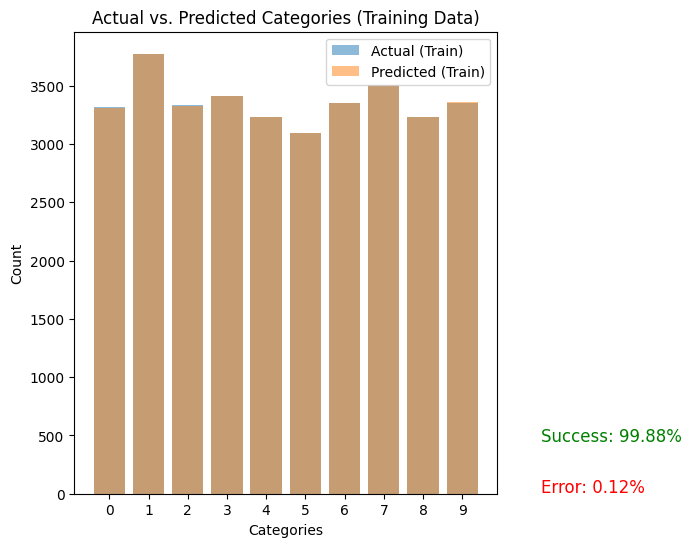

In [41]:

unique_actual_train, counts_actual_train = np.unique(Y_train, return_counts=True)
unique_predicted_train, counts_predicted_train = np.unique(predicted_train, return_counts=True)

# Bar charts for the counts of unique values
unique_actual_train = list(unique_actual_train)
counts_actual_train = list(counts_actual_train)

unique_predicted_train = list(unique_predicted_train)
counts_predicted_train = list(counts_predicted_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(unique_actual_train, counts_actual_train, label='Actual (Train)', alpha=0.5)
plt.bar(unique_predicted_train, counts_predicted_train, label='Predicted (Train)', alpha=0.5)
plt.xlabel('Categories')
plt.xticks(np.arange(10))
plt.ylabel('Count')
plt.legend()
plt.title('Actual vs. Predicted Categories (Training Data)')

# Accuracy of model
# Calculate the percentage of error and percentage of success
total_samples = len(Y_train)
error_percentage = (np.sum(Y_train != predicted_train) / total_samples) * 100
success_percentage = 100 - error_percentage

# Display the percentages
plt.text(11,15, f'Error: {error_percentage:.2f}%', fontsize=12, color='r')
plt.text(11,450, f'Success: {success_percentage:.2f}%', fontsize=12, color='g')



# Repeat the same process for testing data
plt.show()



### Code analysis - Loss over Training Data.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

Epoch 1/15
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0298 - val_accuracy: 0.9930
Epoch 2/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0202 - val_accuracy: 0.9936
Epoch 3/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0141 - val_accuracy: 0.9965
Epoch 4/15
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0209 - val_accuracy: 0.9945
Epoch 5/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0224 - val_accuracy: 0.9940
Epoch 6/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0238 - val_accuracy: 0.9943
Epoch 7/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0207 - val_accuracy:

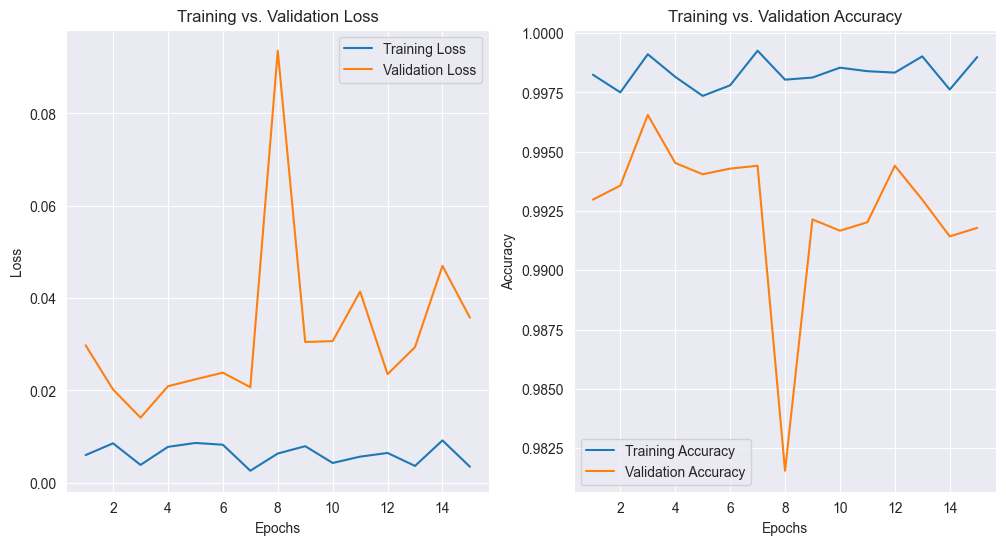

In [14]:
# Training the model
# Fitting with the best fit model
from keras.models import load_model

# load the saved model
model = load_model('best_model_full.hdf5')

history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test))

# Extract training and validation loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create Seaborn plots to visualize the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(train_loss) + 1), y=train_loss, label='Training Loss')
sns.lineplot(x=range(1, len(val_loss) + 1), y=val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(train_accuracy) + 1), y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=range(1, len(val_accuracy) + 1), y=val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.show()


#### Code Analysis by ChatGPT

1. Maximum Training Accuracy: The highest training accuracy achieved was 99.93%, and this occurred during Epoch 7.
2. Maximum Validation Accuracy: The highest validation accuracy reached was 99.65%, which was observed during Epoch 3.

3. Minimum Training Loss: The lowest training loss recorded was 0.0026, and this happened during Epoch 7.

4. Minimum Validation Loss: The lowest validation loss occurred at 0.0141 during Epoch 3.

These maxima provide insight into the model's best performance, with the training and validation accuracies nearing 99.93% and 99.65%, respectively, while the training and validation losses reached their minima at 0.0026 and 0.0141, respectively.

- **Training Loss and Accuracy**:
    
    - The training loss starts at a relatively low value (0.0060) and shows some fluctuations but remains relatively stable.
    - The training accuracy starts at a high value (0.9982) and increases slowly, showing some fluctuations but generally increasing.
- **Validation Loss and Accuracy**:
    
    - The validation loss starts at a higher value (0.0298) and decreases significantly in the first epoch. It continues to decrease but shows some fluctuations.
    - The validation accuracy starts at a lower value (0.9930) and increases gradually, with some fluctuations, ultimately reaching 0.9918.

Here are some observations and considerations based on these results:

1. **Training Performance**: The training performance is consistently high, indicating that the model is fitting the training data well. The fluctuations in training loss and accuracy are normal and may not necessarily indicate overfitting.
    
2. **Validation Performance**: The validation performance is generally good, with the validation loss decreasing and the validation accuracy improving. However, there are some fluctuations in the validation metrics.
    
3. **Fluctuations**: The fluctuations in both training and validation metrics are common, and they can be caused by various factors, including the inherent noise in the data and the random initialization of weights. It's essential to focus on the overall trend rather than individual fluctuations.
    
4. **Consistency**: The consistency in the trend of validation metrics suggests that the model may not be overfitting. Overfitting is often characterized by a decline in validation performance, which is not the case here.
    
5. **Early Stopping**: Based on the current trend, it might be beneficial to implement early stopping to avoid further training if the validation loss starts to increase.
    

Overall, the model appears to be performing well, and there is no clear evidence of overfitting in these training and validation logs. The fluctuations in the metrics are expected and do not necessarily indicate a problem. You can consider implementing early stopping to prevent training beyond the point of optimal performance.